In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/My\ Drive/

SyntaxError: ignored

In [ ]:
cd CategoryAutomation

/content/drive/My Drive/CategoryAutomation


In [ ]:
ls

Onehack_category.csv  Onehack_features.pickle  Onehack.pickle  sample_data/


In [2]:
import pickle
import pandas as pd
with open("home_assist_features.pickle", 'rb') as pickle_file:
  X = pickle.load(pickle_file)

In [3]:
y = pd.read_csv ("home_assist_category.csv")
X = pd.DataFrame(X)

In [4]:
y = y.drop('Unnamed: 0',1)
num_classes = len(y['0'].unique())
y['0'].value_counts().sort_values()

smartir-control-your-climate-tv-and-fan-devices-via-ir-rf-controllers    1
syncing-led-lights-to-playing-music                                      1
how-to-add-sensor-dynmically                                             1
netatmo-stopped-working-after-0-107-7                                    1
integration-with-philips-hue-bridge-result-in-blinking-lights            1
                                                                        ..
external-storage-shared                                                  1
ankoo-recswitch-integration-no-more-working-since-0-11x-x                2
shelly-1pm                                                               2
windows-phone                                                            2
custom-element-doesnt-exist                                              2
Name: 0, Length: 6096, dtype: int64

In [5]:
print(y)

                                                      0
0                                    the-future-of-yaml
1                              bwalarm-akasma74-edition
2                           shelly-ht-wrong-temperature
3                 custom-component-neosmartblinds-cover
4                   circadian-lighting-custom-component
...                                                 ...
6095             node-red-file-node-not-writing-to-file
6096                      missing-entity-in-integration
6097                 dimmer-plugs-unavailable-in-europe
6098                                  ir-fan-automation
6099  absolute-begginers-guide-for-diy-temperature-s...

[6100 rows x 1 columns]


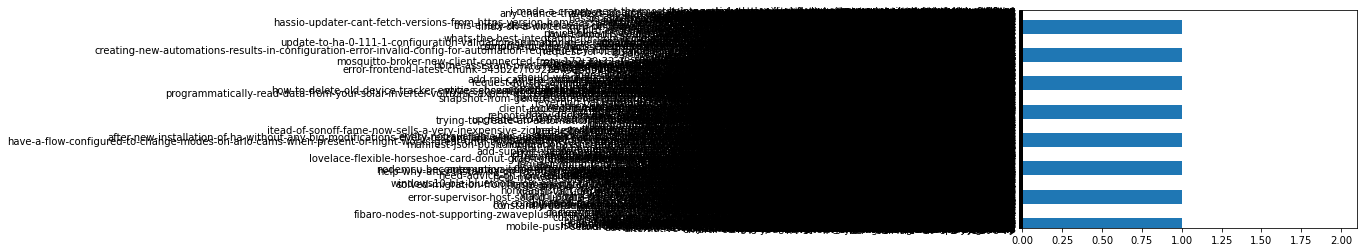

In [6]:
import matplotlib.pyplot as plt
y['0'].value_counts().sort_values().plot(kind = 'barh')
plt.show()

In [7]:
drop_cat=[]
counts = dict(y['0'].value_counts())
for cat in counts.keys():
  if counts[cat]<2:
    drop_cat.append(cat)

In [8]:
Data = pd.concat([y,X],axis=1)
print(Data.shape)
for cat in drop_cat:
  Data.drop(Data.loc[Data['0'] == cat].index, inplace=True)

(6100, 769)


In [9]:
Data.shape

(8, 769)

In [10]:
y = Data['0']
X = Data.drop('0',axis=1)

In [11]:
num_classes = len(y.unique())

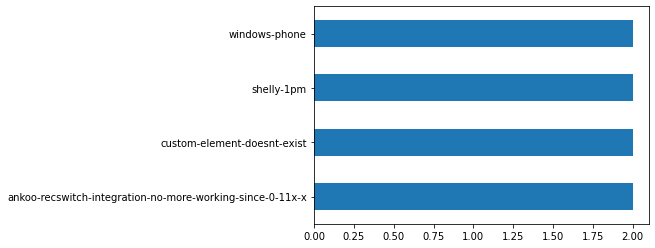

In [12]:
y.value_counts().sort_values().plot(kind = 'barh')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [14]:
from xgboost import XGBClassifier

# Create a classifier
xgb = XGBClassifier(booster='gbtree', objective='multi:softprob', eval_metric="auc", num_class=num_classes)

In [15]:
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

xgb.fit(X_train,y_train)
# Use trained model to predict output of test dataset
val = xgb.predict(X_test)

lb = preprocessing.LabelBinarizer()
lb.fit(y_test)

y_test_lb = lb.transform(y_test)
val_lb = lb.transform(val)

roc_auc_score(y_test_lb, val_lb, average='macro')

0.5

In [16]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [17]:
X_train,y_train = SMOTE().fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


ValueError: ignored

In [18]:
X_train.shape

(5, 768)

In [19]:
pd.DataFrame(y_train)[0].value_counts().sort_values().plot(kind = 'barh')
plt.show()

KeyError: ignored

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

xgb.fit(X_train,y_train)
# Use trained model to predict output of test dataset
val = xgb.predict(X_test)

lb = preprocessing.LabelBinarizer()
lb.fit(y_test)

y_test_lb = lb.transform(y_test)
val_lb = lb.transform(val)

roc_auc_score(y_test_lb, val_lb, average='macro')

0.5

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [22]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=0)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(accuracy_score(y_test, y_pred1))

0.3333333333333333


In [23]:
from sklearn import svm
clf = svm.SVC(decision_function_shape='ovr')
clf.fit(X_train, y_train)
y_pred3 = clf.predict(X_test)
print(accuracy_score(y_test, y_pred3))

0.0


In [24]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.3333333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [25]:
from sklearn.ensemble import AdaBoostClassifier
AdaBst = AdaBoostClassifier(n_estimators=100, random_state=0)
AdaBst.fit(X_train, y_train)
val = AdaBst.predict(X_test)

lb = preprocessing.LabelBinarizer()
lb.fit(y_test)

y_test_lb = lb.transform(y_test)
val_lb = lb.transform(val)

roc_auc_score(y_test_lb, val_lb, average='macro')

0.5

# **TFIDF Approach**

---



In [28]:
with open("home_assist_features.pickle", 'rb') as pickle_file:
  raw_data = pickle.load(pickle_file)

In [29]:
#Build the same dataframe with the raw text information to then turn into TFIDF values
categories = []
texts = []
for i in raw_data:
  categories.append(i[1])
  texts.append(i[3])

selected_dictionary = {'categories': categories, 'texts': texts}
df = pd.DataFrame(selected_dictionary , columns = ['categories', 'texts'])
print(df)

      categories     texts
0      -0.077420  0.145136
1       0.030337  0.235948
2       0.029864  0.250969
3       0.031654  0.247246
4       0.032583  0.238259
...          ...       ...
6095    0.039192  0.247900
6096    0.028565  0.234047
6097    0.038495  0.233743
6098    0.021638  0.241284
6099    0.054618  0.242499

[6100 rows x 2 columns]


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer().fit_transform(texts)
print(len(texts), tfidf.shape)
print(type(tfidf))

AttributeError: ignored

In [31]:
from sklearn.model_selection import train_test_split
X = tfidf
y = categories

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

NameError: ignored

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
model2 = MultinomialNB()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
#print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

0.6396449704142012


In [ ]:
#Lets try optimizing this tfidf classifier by getting rid of lesser used categories
print(df['categories'].value_counts().sort_values())

#indexNames = df.loc[(df['categories'] == "Special Day &amp; Event")].index
#& (df['categories'] == 'Forum Rules, Instructions &amp; Updates') & (df['categories'] == 'Barter System') & (df['categories'] == 'Feedback &amp; Thoughts') & (df['categories'] == "Scammer's List") & (df['categories'] == 'Life Lessons &amp; Experience' & (df['categories'] == 'Money Making Methods &amp; Guides')].index
#df.drop(indexNames , inplace=True)

df = df[df.categories != "Special Day &amp; Event"]

print(df['categories'].value_counts().sort_values())

Series([], Name: categories, dtype: int64)
Series([], Name: categories, dtype: int64)


In [ ]:
'''
drop_cat=[]
counts = dict(df['categories'].value_counts())
for cat in counts.keys():
  if counts[cat]<500:
    drop_cat.append(cat)

Data = pd.concat([y,X],axis=1)
'''
print(df.shape)
for cat in drop_cat:
  df.drop(df.loc[df['categories'] == cat].index, inplace=True)

print(df['categories'].value_counts().sort_values())
df.shape

(8185, 2)
 Tools &amp; Scripts             507
 News &amp; Articles             920
 Discussion &amp; Solutions     1058
 Tutorials &amp; Methods        1858
Away and Freebies               3842
Name: categories, dtype: int64


(8185, 2)

In [ ]:
df

,categories,texts
0,Away and Freebies,"Thanks Thank you Powered by , best viewed with..."
2,Away and Freebies,"Thanks man!Thank you!!Powered by , best viewed..."
3,Away and Freebies,"Hello 1Hackers, been a while. Burnt my compute..."
4,Tutorials &amp; Methods,Save Files from any URL to Google Drive Faster...
5,Discussion &amp; Solutions,I want to learn c#…can anyone suggest me perfe...
...,...,...
8441,Tutorials &amp; Methods,How to Rip and Convert DVD to MP4:• Fire up DV...
8442,Tutorials &amp; Methods,Hello everyone! In this post i want to share w...
8443,Tutorials &amp; Methods,This is an exclusive VIP method to get your we...
8444,Tutorials &amp; Methods,UPDATE: ok I am getting paid and I am converti...


In [ ]:
import re
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
def preprocessing(forum_data):

    forum_data = [[x[0], re.sub('\n',' ',x[1])] for x in forum_data]
    #forum_data = [[x[0], re.sub(r'\W', ' ',x[1])] for x in forum_data]
    forum_data = [[x[0], re.sub(r'\s+[a-zA-Z]\s+', ' ',x[1])] for x in forum_data]
    forum_data = [[x[0], re.sub(r'\^[a-zA-Z]\s+',' ',x[1])] for x in forum_data]
    forum_data = [[x[0], re.sub(r'\s+',' ',x[1])] for x in forum_data]
    forum_data = [[x[0], re.sub( r'^b\s+',' ',x[1])] for x in forum_data]
    forum_data = [[x[0], x[1].lower()] for x in forum_data]
    forum_data = [[x[0], x[1].split()] for x in forum_data]
    stemmer = WordNetLemmatizer()
    forum_data = [[x[0], [stemmer.lemmatize(word) for word in x[1]]] for x in forum_data]
    forum_data = [[x[0], ' '.join(x[1])] for x in forum_data]
    return forum_data

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
